In [1]:
# The data file can be downloaded from the following URL
# http://opsahl.co.uk/tnet/datasets/OF_two-mode_weightedmsg.txt

# The decription of the dataset can be seen from the following URL. 
# Please look at section "Network 2: Facebook-like Forum Network"
# https://toreopsahl.com/datasets/#online_forum_network

import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
%matplotlib inline

In [2]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def island_method(g, iterations=5):
    weights=[edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g,threshold)] for threshold in range(mn,mx,step)]

In [3]:
dataFile = '/Users/burton/000-Semester_06_CUNY/620_Web_Analytics/Project_02/OF_two-mode_weightedmsg.txt'

In [4]:
# We will load the dataset
burton_graph = nx.read_weighted_edgelist(dataFile, delimiter=' ')
cc=nx.connected_component_subgraphs(burton_graph)

In [5]:

islands=island_method(burton_graph)

In [6]:
islands

[[1, <networkx.classes.graph.Graph at 0x106751c50>],
 [35, <networkx.classes.graph.Graph at 0x10d788e90>],
 [69, <networkx.classes.graph.Graph at 0x10bf2b210>],
 [103, <networkx.classes.graph.Graph at 0x1067ebbd0>],
 [137, <networkx.classes.graph.Graph at 0x106910910>]]

In [7]:
# Following are the islands at different depths.
for i in islands:
    print i[0], len(i[1])

1 761
35 76
69 22
103 7
137 4


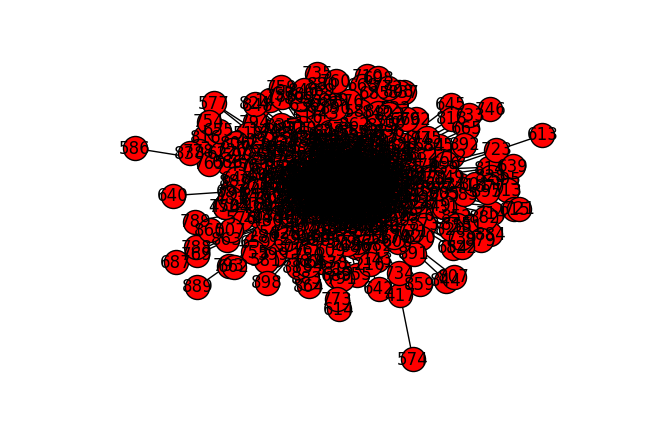

In [22]:
# We will now display the full graph.
nx.draw_spring(burton_graph, with_labels=True)

In [23]:
# Print the Degree Centrality of the nodes of the full graph.
nx.degree_centrality(burton_graph)

{u'1': 0.008908685968819599,
 u'10': 0.14253897550111358,
 u'100': 0.11135857461024498,
 u'101': 0.052338530066815145,
 u'102': 0.04008908685968819,
 u'103': 0.052338530066815145,
 u'104': 0.021158129175946547,
 u'105': 0.021158129175946547,
 u'106': 0.015590200445434297,
 u'107': 0.051224944320712694,
 u'108': 0.005567928730512249,
 u'109': 0.043429844097995544,
 u'11': 0.030066815144766147,
 u'110': 0.03229398663697104,
 u'111': 0.005567928730512249,
 u'112': 0.010022271714922048,
 u'113': 0.006681514476614699,
 u'114': 0.012249443207126948,
 u'115': 0.04008908685968819,
 u'116': 0.010022271714922048,
 u'117': 0.05790645879732739,
 u'118': 0.03229398663697104,
 u'119': 0.017817371937639197,
 u'12': 0.10579064587973273,
 u'120': 0.008908685968819599,
 u'121': 0.04788418708240534,
 u'122': 0.052338530066815145,
 u'123': 0.04008908685968819,
 u'124': 0.031180400890868595,
 u'125': 0.05790645879732739,
 u'126': 0.021158129175946547,
 u'127': 0.01893095768374165,
 u'128': 0.04342984409799

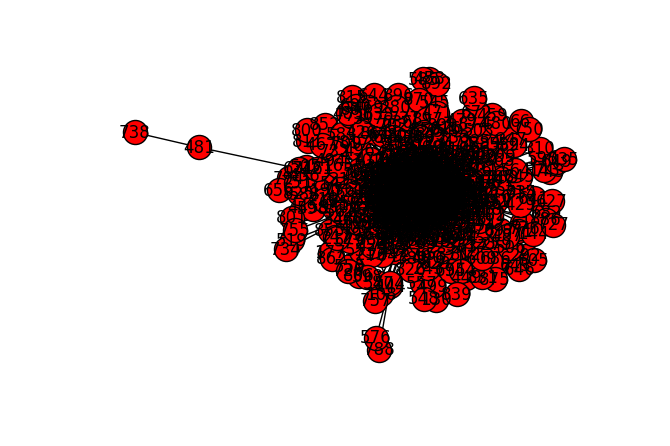

In [24]:
# We will now draw the islands with different depths. We will show graphically how the number of nodes in the islands
# decrease as the water level increases.
nx.draw_spring(islands[0][1], with_labels=True)

In [25]:
nx.degree_centrality(islands[0][1])

{u'1': 0.003947368421052632,
 u'10': 0.09210526315789473,
 u'100': 0.10657894736842105,
 u'101': 0.03289473684210526,
 u'102': 0.03684210526315789,
 u'103': 0.046052631578947366,
 u'104': 0.017105263157894738,
 u'105': 0.021052631578947368,
 u'106': 0.010526315789473684,
 u'107': 0.049999999999999996,
 u'108': 0.0013157894736842105,
 u'109': 0.03684210526315789,
 u'11': 0.018421052631578946,
 u'110': 0.02631578947368421,
 u'111': 0.003947368421052632,
 u'112': 0.009210526315789473,
 u'113': 0.006578947368421052,
 u'114': 0.006578947368421052,
 u'115': 0.02631578947368421,
 u'116': 0.003947368421052632,
 u'117': 0.049999999999999996,
 u'118': 0.024999999999999998,
 u'119': 0.009210526315789473,
 u'12': 0.09473684210526316,
 u'120': 0.005263157894736842,
 u'121': 0.02236842105263158,
 u'122': 0.039473684210526314,
 u'123': 0.02631578947368421,
 u'124': 0.021052631578947368,
 u'125': 0.042105263157894736,
 u'126': 0.011842105263157895,
 u'127': 0.010526315789473684,
 u'128': 0.02894736842

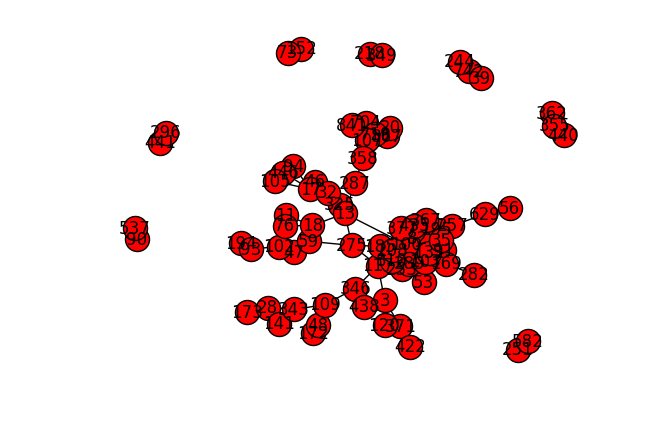

In [26]:
nx.draw_spring(islands[1][1], with_labels=True)

In [27]:
nx.degree_centrality(islands[1][1])

{u'100': 0.21333333333333335,
 u'102': 0.02666666666666667,
 u'103': 0.013333333333333334,
 u'105': 0.013333333333333334,
 u'107': 0.06666666666666667,
 u'109': 0.04,
 u'11': 0.013333333333333334,
 u'117': 0.06666666666666667,
 u'120': 0.013333333333333334,
 u'13': 0.09333333333333334,
 u'131': 0.013333333333333334,
 u'141': 0.013333333333333334,
 u'152': 0.013333333333333334,
 u'169': 0.02666666666666667,
 u'17': 0.06666666666666667,
 u'172': 0.013333333333333334,
 u'173': 0.013333333333333334,
 u'18': 0.05333333333333334,
 u'185': 0.04,
 u'194': 0.013333333333333334,
 u'195': 0.013333333333333334,
 u'20': 0.013333333333333334,
 u'208': 0.02666666666666667,
 u'218': 0.013333333333333334,
 u'244': 0.013333333333333334,
 u'251': 0.013333333333333334,
 u'253': 0.02666666666666667,
 u'257': 0.02666666666666667,
 u'275': 0.05333333333333334,
 u'28': 0.02666666666666667,
 u'282': 0.013333333333333334,
 u'287': 0.02666666666666667,
 u'289': 0.04,
 u'296': 0.013333333333333334,
 u'3': 0.05333

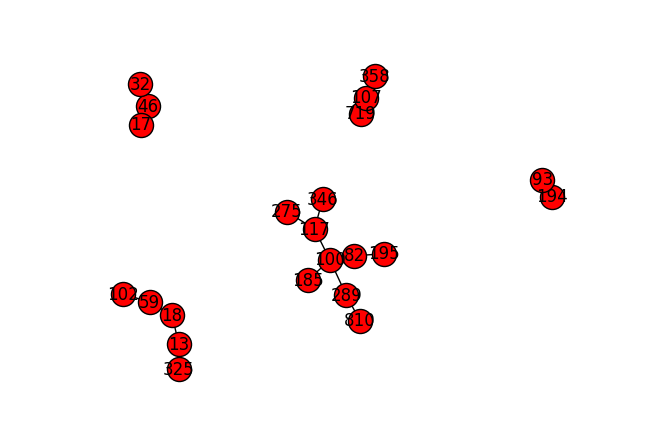

In [28]:
nx.draw_spring(islands[2][1], with_labels=True)

In [29]:
nx.degree_centrality(islands[2][1])

{u'100': 0.19047619047619047,
 u'102': 0.047619047619047616,
 u'107': 0.09523809523809523,
 u'117': 0.14285714285714285,
 u'13': 0.09523809523809523,
 u'17': 0.047619047619047616,
 u'18': 0.09523809523809523,
 u'185': 0.047619047619047616,
 u'194': 0.047619047619047616,
 u'195': 0.047619047619047616,
 u'275': 0.047619047619047616,
 u'289': 0.09523809523809523,
 u'32': 0.047619047619047616,
 u'325': 0.047619047619047616,
 u'346': 0.047619047619047616,
 u'358': 0.047619047619047616,
 u'46': 0.09523809523809523,
 u'59': 0.09523809523809523,
 u'719': 0.047619047619047616,
 u'810': 0.047619047619047616,
 u'82': 0.09523809523809523,
 u'93': 0.047619047619047616}

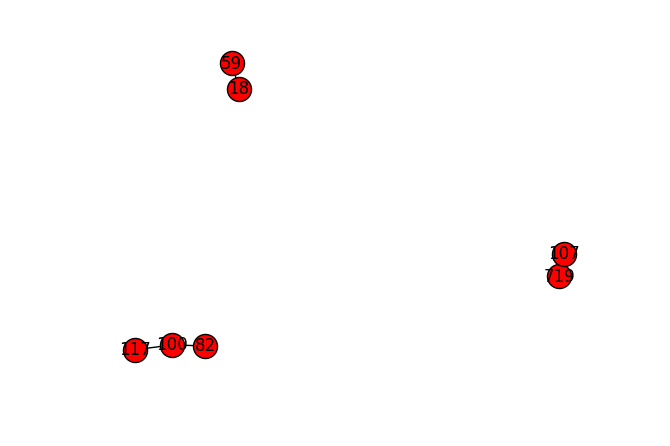

In [30]:
nx.draw_spring(islands[3][1], with_labels=True)

In [31]:
nx.degree_centrality(islands[3][1])

{u'100': 0.3333333333333333,
 u'107': 0.16666666666666666,
 u'117': 0.16666666666666666,
 u'18': 0.16666666666666666,
 u'59': 0.16666666666666666,
 u'719': 0.16666666666666666,
 u'82': 0.16666666666666666}

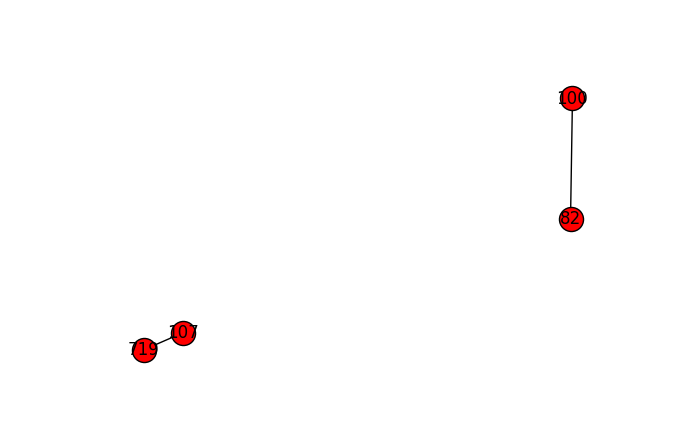

In [8]:
nx.draw_spring(islands[4][1], with_labels=True)

In [33]:
nx.degree_centrality(islands[4][1])

{u'100': 0.3333333333333333,
 u'107': 0.3333333333333333,
 u'719': 0.3333333333333333,
 u'82': 0.3333333333333333}